In [30]:
# 导入所需的库
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram 

In [32]:
Yourinput = int(input("输入数字："))

输入数字：2016140128


In [33]:
# 十进制转二进制
n_b = bin(Yourinput)
n_a = n_b[2:]
secretnumber = n_a
n = len(secretnumber)
circuit = QuantumCircuit(n+1,n)
# 第一层电路
circuit.x(n)
circuit.barrier()
# 第二层电路
circuit.h(range(n+1))
circuit.barrier()
# 第三层电路
for ii,yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,n)
        
circuit.barrier()
# 第四层电路
circuit.h(range(n+1))
circuit.barrier()
circuit.measure(range(n),range(n))

In [34]:
# 原二进制序列（做对比）
n_a

'1111000001010111101101101100000'

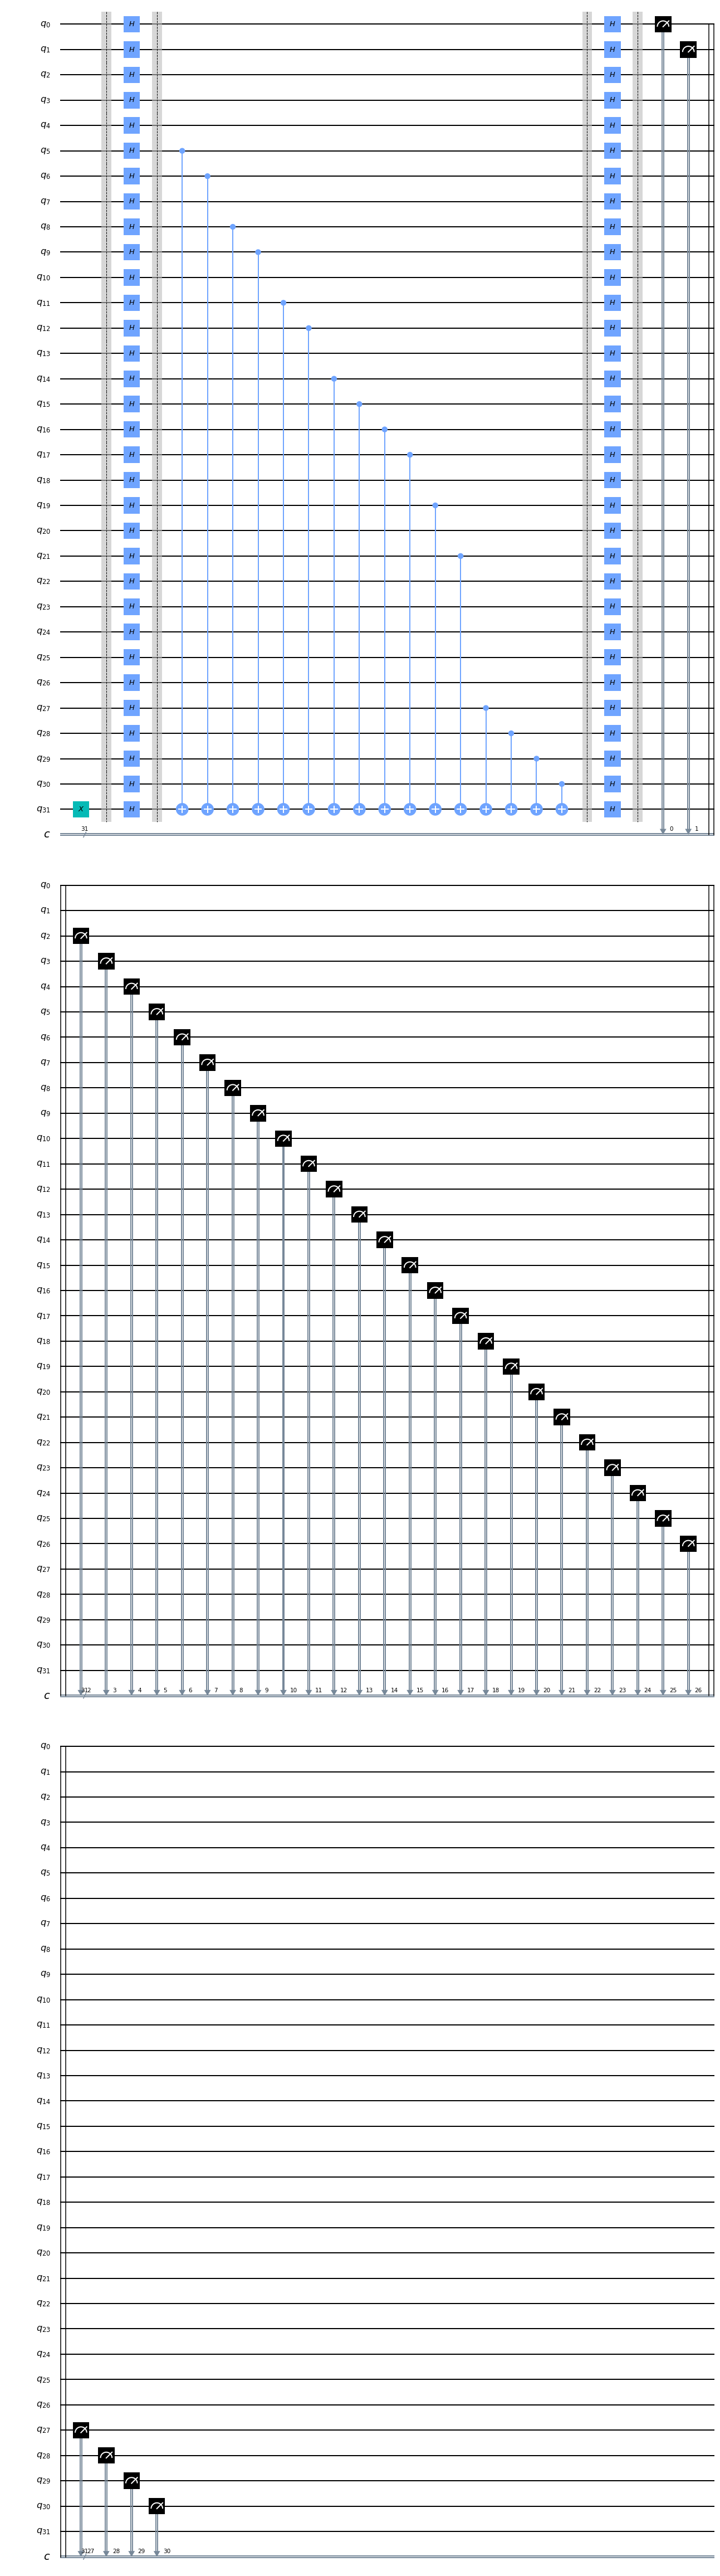

In [37]:
# 画出电路
circuit.draw(output='mpl')

In [35]:
# 后端量子计算机运行结果
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1111000001010111101101101100000': 1}


In [36]:
# 转十进制
counts_l = list(counts)
l = ''.join(counts_l)
int(l,2)

2016140128